## Import Libraries

In [4]:
import numpy as np
import pandas as pd
import os
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV,cross_val_score




## Import the dataset

In [5]:
data = pd.read_csv("Data\dataset.csv")
data.head()

,feeling nervous,panic,breathing rapidly,sweating,having trouble in concentration,having trouble in sleeping,having trouble with work,feel hopeless,feel angry,over react,...,gained weight,have material possessions,an introvert,a popping up stressful memory,having nightmares,avoid people or activities,feel negative,trouble concentrating,blamming yourself,Disorder
0,yes,yes,yes,yes,yes,yes,no,no,no,no,...,no,no,no,no,no,no,no,no,no,Anxiety
1,no,no,no,no,no,no,yes,yes,yes,yes,...,no,no,no,no,no,no,no,no,no,Depression
2,no,no,no,no,no,no,no,no,no,no,...,yes,yes,yes,no,no,no,no,no,no,Loneliness
3,no,no,no,no,no,no,no,no,no,no,...,no,no,no,yes,yes,yes,yes,yes,yes,Stress
4,no,no,no,no,no,no,no,no,no,no,...,no,no,no,no,no,no,no,no,no,Normal


In [3]:
data['Disorder'].unique()

array(['Anxiety', 'Depression', 'Loneliness', 'Stress', 'Normal'],
      dtype=object)

## Converting the dataset to a numpy array

In [4]:
df = np.array(data.to_numpy())

## Labeling the categorical data using label encoder

In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in data[:]:
    data[i]=le.fit(data[i]).transform(data[i])



## Reading the Column names

In [6]:
col = list()
for i in data:
    col.append(i)

## Checking for null values

In [7]:
data.isnull().sum()

feeling nervous                    0
panic                              0
breathing rapidly                  0
sweating                           0
having trouble in concentration    0
having trouble in sleeping         0
having trouble with work           0
feel hopeless                      0
feel angry                         0
over react                         0
have changes in eating             0
have suicidal thought              0
feeling tired                      0
have a close friend                0
have a social media addiction      0
gained weight                      0
have material possessions          0
an introvert                       0
a popping up stressful memory      0
having nightmares                  0
avoid people or activities         0
feel negative                      0
trouble concentrating              0
blamming yourself                  0
Disorder                           0
dtype: int64

## Splitting data into variables

In [8]:
X,Y=data[col[:24]], data['Disorder']

## Splitting into training and testing data

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, y_test=train_test_split(X,Y, test_size=.33, random_state=42)

## Decision tree classifier

In [10]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(  max_depth= 10,
                                    max_features = 'auto',
                                    min_samples_leaf= 1,
                                    min_samples_split = 2)
clf_gini.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=10, max_features='auto')

In [11]:
y_pred_gini = clf_gini.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 1.0000


In [13]:
prediction_test = clf_gini.predict(X_test)
classes = ['Anxiety', 'Depression', 'Loneliness', 'Stress', 'Normal']
def plot_confusionmatrix(pred,test,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(pred,test)
    sb.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()    

Training Accuracy is:  1.0
Testing Accuracy is:  1.0
Test Confusion matrix


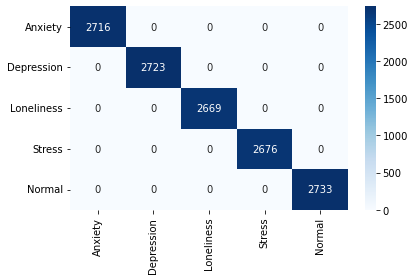

In [14]:
#Training Accuracy
print("Training Accuracy is: ", clf_gini.score(X_train, Y_train))
#Test Accuracy
print("Testing Accuracy is: ", clf_gini.score(X_test, y_test))


plot_confusionmatrix(y_test,prediction_test,dom='Test')


## Random Forest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(bootstrap= True,
 max_depth = 1,
 max_features = 'auto',
 min_samples_leaf = 1,
 min_samples_split = 2,
 n_estimators = 20)
model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=1, n_estimators=20)

In [16]:
random_predict = model.predict(X_test)
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, random_predict)))

Model accuracy score with criterion gini index: 1.0000


Training Accuracy is:  1.0
Testing Accuracy is:  1.0
Test Confusion matrix


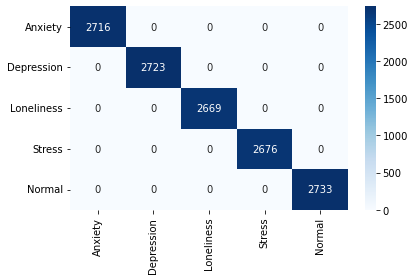

In [17]:
#Training Accuracy
print("Training Accuracy is: ", model.score(X_train, Y_train))
#Test Accuracy
print("Testing Accuracy is: ", model.score(X_test, y_test))


plot_confusionmatrix(y_test,prediction_test,dom='Test')


## Test Case 1

In [43]:
t1 = ['breathing rapidly' , 'having trouble with work', 'have suicidal thought', 'having nightmares' , 'gained weight']

In [44]:
r = []
for i in col[0:24]:
    if i in t1:
        r.append(1)
    else:
        r.append(0)
b=[r]
test = pd.DataFrame(b)
test


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [45]:
if y_pred_gini[0] == 0:
    disorder = "Anxiety"
elif y_pred_gini[0] == 1:
    disorder = "Depression"
elif y_pred_gini[0] == 2:
    disorder = "Loneliness"
elif y_pred_gini[0] == 3:
    disorder = "Normal"
elif y_pred_gini[0] == 4:
    disorder = "Stress"

print(disorder)

Depression


# Hyper parameter Tuning

In [21]:
X,Y=data[col[:24]], data['Disorder']

In [22]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 100, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10,20]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [23]:
# Create the param grid
import random
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [20, 28, 37, 46, 55, 64, 73, 82, 91, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [24]:
model = RandomForestClassifier()

In [25]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = 20, verbose=2, n_jobs = 4)

In [26]:
rf_Grid.fit(X_train, Y_train)

Fitting 20 folds for each of 320 candidates, totalling 6400 fits


GridSearchCV(cv=20, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [20, 28, 37, 46, 55, 64, 73, 82, 91,
                                          100]},
             verbose=2)

In [27]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 20}

In [28]:
print (f'Train Accuracy - : {rf_Grid.score(X_train,Y_train):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(X_test,y_test):.3f}')

Train Accuracy - : 1.000
Test Accuracy - : 1.000


In [29]:
prediction_test = rf_Grid.predict(X_test)

Test Confusion matrix


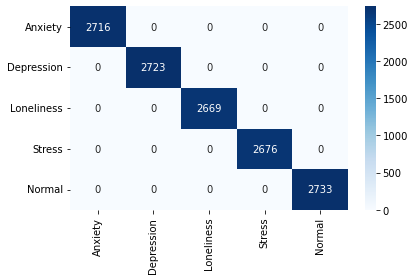

In [30]:
plot_confusionmatrix(y_test,prediction_test,dom='Test')